<a href="https://colab.research.google.com/github/knalin55/Object-Detection-and-Marking/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/knalin55/Object-Detection-and-Marking

Cloning into 'Object-Detection-and-Marking'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 46 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


import os
import PIL
from PIL import Image
from keras.utils import to_categorical
from keras.optimizers import SGD
import random    
import keras
from keras.layers                   import Layer, UpSampling2D, MaxPooling2D, ReLU, Activation, Conv2D,MaxPooling2D, Softmax, Concatenate, Input, Flatten, Dense, Convolution2D, BatchNormalization, Activation, Reshape,Conv2D
from keras.models                   import Model, load_model, save_model
from keras.regularizers             import l2
import keras.backend                as K
from keras.models import load_model

from skimage.feature import match_template
from numpy import reshape
from matplotlib.pyplot import imshow
import math

# Libraries

Major Libraries Used

*   OpenCV (cv2): It is a computer vision library with variety of advanced functions. 
*   Pillow (PIL): It is image processing library mostly used for simpler stuffs such as cropping or adding basic filters.
*   Numpy (np): Library used mostly for handling arrays and matrices.
*   Keras : It is used for building a model architecture for Neural Networks in Python.
*   Math : Library used for mathematical tasks.

# How computer interpret image

Compute interpret images as matrix of pixel values. So value of each pixelis a three element matrix each representing value of Blue, Green and Red (The primary colours) but not in respective order. These colour value can range from 0 to 255.

This is how Pillow see the image


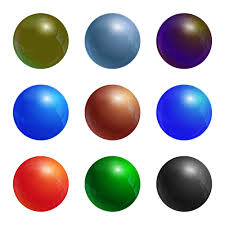

In [3]:
#Reading image with Pillow
im = Image.open('/content/Object-Detection-and-Marking/Data/3.jpg')
image_pil = np.asarray(im)
print("This is how Pillow see the image")
#Showing image using openCV format
cv2_imshow(image_pil)

This is how openCV see the image


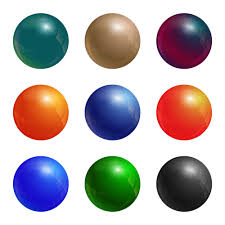

In [4]:
#Reading image with openCV
im = cv2.imread('/content/Object-Detection-and-Marking/Data/3.jpg')
print("This is how openCV see the image")
#Showing image using openCV format
cv2_imshow(im)

What is the difference between reading an image using openCV an Pillow?

In [5]:
#Answer: openCV use [Blue, Green, Red] channel while Pillow use [Red, Green, Blue] channel 

Image Matrix

In [6]:
print("This is how computer interprets image using openCV")
print("Shape of matrix is " +str(im.shape))
print(im)

This is how computer interprets image using openCV
Shape of matrix is (225, 225, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Check the image matrix of Pillow by writting code in cell below or just un-commenting the whole cell.

In [7]:
#Write code here

#Un-comment below
#im = Image.open('/content/Object-Detection-and-Marking/Data/3.jpg')
#image_pil = np.asarray(im)
#print("This is how computer interprets image using Pillow")
#print("Shape of matrix is " +str(im.shape))
#print(im)

How to change the shape of image matrix from (Height, Width, 3) to (Height, Width).

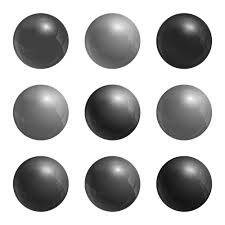

Shape of matrix is (225, 225)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [8]:
#Changing Clourful image to Gray image just to make pixel values single element instead of three values(BGR)
#To get this single value we use Gray = 0.114 * Blue + 0.299 * Red + 0.587 * Green
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)
print("Shape of matrix is " +str(imgray.shape))
print(imgray)

Create your own single channel image by using image matrix and averaging BGR values. You can write code in cell below or just un-commenting the whole cell.

In [9]:
#Write code here


#Un-comment below
#im = cv2.imread('/content/Object-Detection-and-Marking/Data/3.jpg')
#new_im=[]
#for key in im:
#  new_element=[]
#  for i in key:
#    weigh= np.ndarray((3,), buffer=np.array([1, 0.114 , 0.587 ,  0.299]), offset=np.int_().itemsize, dtype=float)
#    avg= np.average(i, weights=weigh )
#    new_element.append(avg)
#  new_im.append(new_element)
#new_im= np.asarray(new_im)
#cv2_imshow(new_im)

# Some methods for Object Counting without Neural Network

Possible way to count balls in image can be using edge-detection based object detction methods.

**Contour Method**

Contours are defined as the line joining all the points along the boundary of an image that are having the same intensity. Here, we use Contours for object detection.

No. of Contours: 9


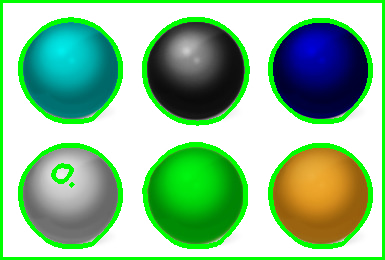

In [10]:
i=2
im = cv2.imread("/content/Object-Detection-and-Marking/Data/"+str(i)+'.jpg')
output = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

#Grayscale pixel value grater than Threshold will be converted to 1 rest 0.
ret, thresh = cv2.threshold(imgray, 220, 250, 0)

#Find Contours in mage
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#Draw the Contours on image
cv2.drawContours(output, contours, -1, (0,255,0), 3)
print("No. of Contours: "+ str(len(contours)))
cv2_imshow(output)

For which of the images (select image by changing i to 1-5) Contour method produces best and worst results.

No. of Contours: 9


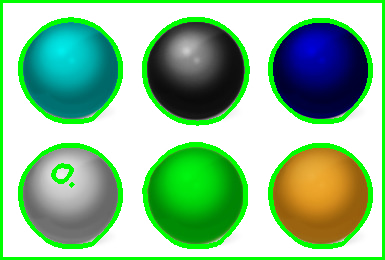

In [11]:
#i= write number here

im = cv2.imread("/content/Object-Detection-and-Marking/Data/"+str(i)+'.jpg')
output = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 220, 250, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(output, contours, -1, (0,255,0), 3)
print("No. of Contours: "+ str(len(contours)))
cv2_imshow(output)

**Hough Gradient Method**

No. of Circles: 7


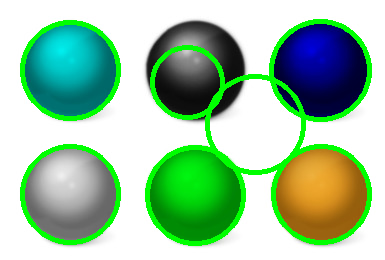

In [12]:
i=2
im = cv2.imread("/content/Object-Detection-and-Marking/Data/"+str(i)+'.jpg')
output = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Apply Hough transform on the grayscale image. 
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1.2, 80,\
                                    param1 = 50,param2 = 30, minRadius = 0, maxRadius = 0) 


if circles is not None:
  print("No. of Circles: "+ str(len(circles[0])))
  
  circles = np.round(circles[0, :]).astype("int")
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
  cv2_imshow(output)


For which of the images (select image by changing i to 1-5) Hough Gradient Method produces best and worst results.

No. of Circles: 7


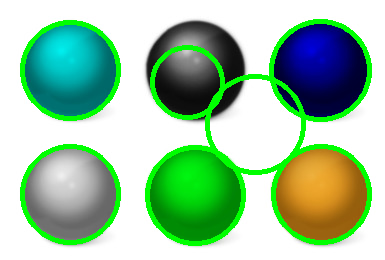

In [13]:
#i= write number here

im = cv2.imread("/content/Object-Detection-and-Marking/Data/"+str(i)+'.jpg')
output = im.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Apply Hough transform on the grayscale image. 
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT, 1.2, 80,\
                                    param1 = 50,param2 = 30, minRadius = 0, maxRadius = 0) 


if circles is not None:
  print("No. of Circles: "+ str(len(circles[0])))
  
  circles = np.round(circles[0, :]).astype("int")
  # loop over the (x, y) coordinates and radius of the circles
  for (x, y, r) in circles:
    # corresponding to the center of the circle
    cv2.circle(output, (x, y), r, (0, 255, 0), 4)
  cv2_imshow(output)

So, what are some of the challenges we noticed here?

# Slides

# **Object counting with Neural Network**

Then what other option we have then train a neural network. 

In [14]:
#Let's use  MobileNetV2 architecture (a pre built CNN architecture)
mob = keras.applications.MobileNetV2(
    input_shape=(60,60,1),
    alpha=1.0,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=2)


In [15]:
mob.summary()

sgd= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

mob.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "mobilenetv2_1.00_60"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60, 60, 1)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 30, 30, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 30, 30, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 30, 30, 32)   0           bn_Conv1[0][0]                   
________________________________________________________________________________

In [16]:
#Sample_CNN_model.

input1= Input((60,60,1))


conv1  = Conv2D(32, (4,4), padding='same')(input1)
act1   = Activation("relu")(conv1)

conv2  = Conv2D(32, (3,3), padding='same')(act1)
act2   = Activation("relu")(conv2)

maxp   = MaxPooling2D((2,2))(act2)

at     = Flatten()(maxp)
dense  = Dense(64, activation='sigmoid')(at)
out    = Dense(2, activation='softmax')(dense)


model  = Model(inputs= input1, outputs= out)

model.summary()

sgd= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 60, 60, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 32)        544       
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0     

It's your time to write your own CNN model, name it exercise_model.

In [17]:
#Write your code here.

# HOW WE CREATE DATASET FOR TRAINING

We manually crop diameter*diameter enclosing individual ball's circular ends such that center of circle(ball) and  square(window) coincide approximately. In case of partially visible balls one just try to coincide it's center with window's even if another rod is getting inside window. Save this data in a folder.

 Saving diameter*diameter cropped image from original image by shifting window by 2 pixel each time (given the restriction that the image is not present in the manually cropped images folder). Here this 2 is of no  particular concern, we are trying to create large dataset while covering whole image. A dictionary is also created with image names as keys and label 0.

We won't run this code as dataset is too big, you can try it later from our github repository. (P.S. We haven't uploaded the training data, soon we will)

In [ ]:

directory = "Data/label_1" #Location of folder where we kept the manually cropped images.
path1 = "Data/label_0" #Location of folder where we will save our label '0' images

labels={}

n=0
count=0

for i in range(np.int64((im.size[0]- 60)/4) + 1):
    for k in range(np.int64((im.size[1] - 60)/4) + 1):
        count  = 0
        x      = ""
        y      = ""
        left   = 4*i
        right  = 4*i + 60
        top    = 4*k
        bottom = 4*k + 60 
        m      = im.crop((left, top, right, bottom))

        for files in os.listdir(directory): #Here we check whether there is any common image in data crated manually and image created above code, if there is, then we don't save it in the folder where we are saving our label '0' images. 
            file = Image.open(os.path.join(directory,files))
            if np.array_equal(np.asarray(m), np.asarray(file)):
                break
            else:
                count=count+1
                
        if count == 189: #Here, 416 is the number of label '1' images we got while manually cropping. 
            x         = x.join(['1_', str(n)]) #The images would be saved as 1_1.jpg, 1_2.jpg,... . Here, '1_' is insignificant. 
            labels[x] = '0'
            y         = y.join([x, '.jpeg'])
            m         = m.save(os.path.join(path1, y))
            n         = n+1

num_lab_0=n-1   #We will need this number in generating the training dataset          

Data created maually is labelled 1, but it is too less compared to data labelled 0. So, what can we do solve this class imbalance?

A Solution can be to rotate and transpose manually created data to make new data with label 1 which is 7 times manually created data.

Actual image.


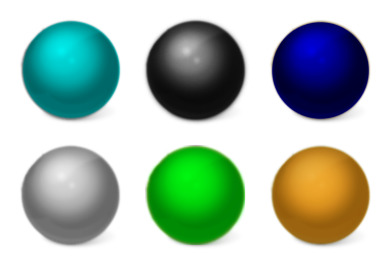

In [18]:
im=Image.open('/content/Object-Detection-and-Marking/Data/2.jpg')
print("Actual image.")
im

Rotate Image

Rotated image.


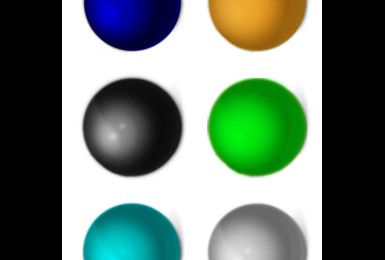

In [19]:
print("Rotated image.")
new_im=im.rotate(90)
new_im


Transpose of image

Transposed image.


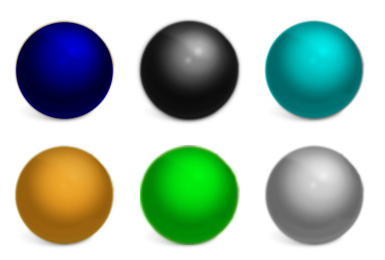

In [20]:
print("Transposed image.")
new_im= im.transpose(Image.FLIP_LEFT_RIGHT)
new_im

We won't access training data here but you can try it later from our github repository. (P.S. We haven't uploaded the training data, soon we will)

In [ ]:
# Code to train with balanced data of each class

for files in os.listdir(directory):
    file = Image.open(os.path.join(directory,files))
    file_t = file.transpose(Image.FLIP_LEFT_RIGHT) 
    for i in range(4):
        x = ""
        p = ""
        x = x.join(["1_", str(n)])
        p = p.join([x, '.jpeg'])
        rot = file.rotate(90*i)
        labels[x]='1'
        rot = rot.save(os.path.join(path1,p))
        n=n+1
    for i in range(4):
        x = ""
        p = ""
        x = x.join(["1_", str(n)])
        p = p.join([x, '.jpeg'])
        rot = file_t.rotate(90*i)
        labels[x]='1'
        rot = rot.save(os.path.join(path1,p))
        n=n+1
    

We will now train the pre-built model MobileNetV2

Still data with label 0 is too large compared to the data with label 1. Should we randomly choose from label 0 data to make their ratio comparable (that is 1:3). 

In [ ]:
#As data with label 0 is too large compared to the data with label 1, we want to randomly choose from label 0 data to make
# ratio 1:3. But we don't want to miss the surrounding images of label 1 data for better learning, hence we do the choosing 
# after every two epoch.

for j in range(15):
    lis = random.choices(range(num_lab_0), k=6400)
    for i in range(num_lab_0, n):
        lis.append(i)
    lis = random.sample(lis, len(lis))
    image_train = np.zeros((len(lis), 60, 60, 1))
    lab         = np.zeros((len(lis), 1))
    i=0
    for keys in lis:
        a              = ""
        b              = ""
        a              = a.join(["1_", str(keys), ".jpeg"])
        b              = b.join(["1_", str(keys)])
        path_im        = os.path.join(path1, a)
        img_t          = np.asarray(Image.open(path_im).convert('L')).reshape((60,60,1))
        image_train[i] = img_t
        lab[i]         = labels[b]  
        i=i+1
    lab = to_categorical(lab, 2)
    #We take 10% of the training set as validation data
    mob.fit(x= image_train , y=lab, epochs=2, verbose=1,  shuffle=True, validation_split= 0.1, batch_size=28) 

In [ ]:
#Saving the trained model

mob.save('steel_bar_count.h5')

Similarly you can save your trained model (Exercise_model) too.

# Testing the model

In [21]:
#model path
model = load_model(r'/content/Object-Detection-and-Marking/ball_count_MobnetV2.h5')

In [22]:
def reshape_img(b,x):
    b = b.resize((np.int64(b.size[0]/x), np.int64(b.size[1]/x)))
    left= 0
    right= b.size[0] - (b.size[0]%2)
    top= 0
    bottom= b.size[1] - (b.size[1]%2)
    b= b.crop((left, top, right, bottom))
    return b

In [23]:
def find_radius(image):
    image = np.asarray(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ab=0
    ba=0
    for thr in range(2, 13):
        _, binary = cv2.threshold(gray, 10*thr + 5, 255, cv2.THRESH_BINARY)
        max1 = []
        rad  = []
        ind=0
        for i in range(10,50):
            cir = np.zeros((2*i,2*i))
            circ = cv2.circle(np.asarray(cir), (i,i), radius = i, color=(255, 255), thickness=-1)
            template = circ
            result= match_template(binary, template)
            max1.append(np.amax(result))
            rad.append(i)
    radius = rad[max1.index(max(max1))]
    print("radius =", radius)
    return radius

Create your custom radius finding code by playing with threshold on image 1.jpg and2.jpg

In [24]:
#Write your code here

#Path of 1.jpg is "/content/Object-Detection-and-Marking/Data/1.jpg"
#Path of 2.jpg is "/content/Object-Detection-and-Marking/Data/2.jpg"

In [25]:
def find_centres(img):
    radii = find_radius(img)
    x=0
    if radii<20:
        print("Balls are too small to count.")
        print(" Please give nearer image.")
        quit()
    if 20<=radii<=30:
        x=1
    elif 30<radii:
        x= math.ceil(radii/30)
#    sample = reshape_img(img,x)
#    b      = np.asarray(sample.convert('L')).reshape(sample.size[0], sample.size[1], 1)
    b = reshape_img(img, x)
    z= []
    x= []
    y= []
    for i in range(np.int64((b.size[0]- 60)/3) + 1):
        for k in range(np.int64((b.size[1] - 60)/3) + 1):
            left   = 3*i
            right  = 3*i + 60
            top    = 3*k
            bottom = 3*k + 60 
            count=0
            m      = b.crop((left, top, right, bottom))
            m      = reshape(np.asarray(m.convert('L')), (1,60,60,1))
            pred   = model.predict(m)
            if pred[0][1] >= 0.3:
                z.append(pred[0][1])
                x.append(np.int64((left+right)/2))
                y.append(np.int64((top+bottom)/2))
    x1 = np.array(x)
    y1= np.array(y)
    z1= np.array(z)
    x1.resize(len(x),1)
    y1.resize(len(x),1)
    z1.resize(len(x),1)
    xy= np.concatenate([x1,y1,z1], axis=-1)
    xy = xy.tolist()
    for i in range(np.int64((b.size[0] - 8)/2) + 1):
        for k in range(np.int64((b.size[1] - 8)/2) + 1):
            inde=[]
            p=0
            left   = 2*i
            right  = 2*i + 8
            top    = 2*k
            bottom = 2*k + 8 
            yx=[]
            for item in xy:
                if left <= item[0] <= right and top <= item[1] <= bottom:
                    if p >= item[2]:
                        try:
                            xa = xy.index(xy[xy.index(item)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(item)])
                    elif 0 < p < item[2]:
                        try:
                            xa = xy.index(xy[xy.index(yx)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(yx)])
                            p=item[2]
                    else:
                        p=item[2]
                        yx=item
    xy = np.array(xy)
    #marking the centres
    for i in range(len(xy)):
        b = cv2.circle(np.asarray(b), (np.int64(xy[i][0]),np.int64(xy[i][1])), radius = 0, color=(255, 0, 0), thickness=2)
    img = Image.fromarray(b, 'RGB')
    #byte_io = BytesIO()
    img.save('output.jpeg')
    print("Number of balls = ", len(xy))

In [28]:
#image path
img= Image.open(r'/content/Object-Detection-and-Marking/Data/balls.jpeg') 

In [29]:
find_centres(img)

radius = 28


KeyboardInterrupt: ignored

In [ ]:
Image.open("/content/Object-Detection-and-Marking/output_MobNetV2.jpeg")

# Let's see another example of trying to count steel rods stack

In [30]:
#model path
model = load_model(r'/content/Object-Detection-and-Marking/steel_bar_coun.h5')

In [31]:
def find_radius(image):
    image = np.asarray(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ab=0
    ba=0
    for thr in range(2, 13):
        _, binary = cv2.threshold(gray, 10*thr + 5, 25, cv2.THRESH_BINARY)
        max1=[]
        ind=0
        for i in range(1,50):
            cir = np.zeros((2*i,2*i))
            circ = cv2.circle(np.asarray(cir), (i,i), radius = i, color=(255, 255), thickness=-1)
            template = circ
            result= match_template(binary, template)
            max1.append(np.amax(result))
        max_l=0
        max_val=0
        ind=0
        for i in range(6):
            max1.remove(max1[0])
            max_val= max(max1)   
            max_l= 7 + max1.index(max_val)    
        if ba <= max_val:
            ba = max_val
            ab = max_l
    radii=ab/ba
    print("radius =", radii)
    return radii

In [32]:
def find_centres(img):
    radii = find_radius(img)
    x=0
    if radii<7:
        print("Rods are too small to count.")
        print(" Please give nearer image.")
        quit()
    if 7<=radii<=10:
        x=1
    elif 10<radii:
        x= math.ceil(radii/10)
    b= reshape_img(img,x)
    z= []
    x= []
    y= []
    for i in range(np.int64((b.size[0]- 20)/2) + 1):
        for k in range(np.int64((b.size[1] - 20)/2) + 1):
            left   = 2*i
            right  = 2*i + 20
            top    = 2*k
            bottom = 2*k + 20 
            count=0
            m      = b.crop((left, top, right, bottom))
            m= reshape(np.asarray(m), (1,20,20,3))
            pred= model.predict(m)
            if pred[0][1] >= 0.3:
                z.append(pred[0][1])
                x.append(np.int64((left+right)/2))
                y.append(np.int64((top+bottom)/2))
    x1 = np.array(x)
    y1= np.array(y)
    z1= np.array(z)
    x1.resize(len(x),1)
    y1.resize(len(x),1)
    z1.resize(len(x),1)
    xy= np.concatenate([x1,y1,z1], axis=-1)
    xy = xy.tolist()
    for i in range(np.int64((b.size[0] - 8)/2) + 1):
        for k in range(np.int64((b.size[1] - 8)/2) + 1):
            inde=[]
            p=0
            left   = 2*i
            right  = 2*i + 8
            top    = 2*k
            bottom = 2*k + 8 
            yx=[]
            for item in xy:
                if left <= item[0] <= right and top <= item[1] <= bottom:
                    if p >= item[2]:
                        try:
                            xa = xy.index(xy[xy.index(item)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(item)])
                    elif 0 < p < item[2]:
                        try:
                            xa = xy.index(xy[xy.index(yx)])
                        except:
                            break
                        else:
                            xy.remove(xy[xy.index(yx)])
                            p=item[2]
                    else:
                        p=item[2]
                        yx=item
    xy = np.array(xy)
    #marking the centres
    for i in range(len(xy)):
        b = cv2.circle(np.asarray(b), (np.int64(xy[i][0]),np.int64(xy[i][1])), radius = 0, color=(255, 0, 0), thickness=2)
    img = Image.fromarray(b, 'RGB')
    img.show()
    img.save(r'output.jpg')
    print("Number of rods = ", len(xy))

In [33]:
#image path
img= Image.open(r'/content/Object-Detection-and-Marking/Data/rod_test.jpg')

In [34]:
find_centres(img)

radius = 8.869624076809222


KeyboardInterrupt: ignored

In [ ]:
Image.open("/content/Object-Detection-and-Marking/output_rod_saved.jpg")